<a href="https://colab.research.google.com/github/RiRa25/Loan-Prediction-System/blob/main/OEA_preprocessing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('/content/loanApproval.csv')
df.head()



,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df = df.dropna()
print(df.isnull().sum())
print("Shape of DataFrame after removing null values:", df.shape)

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64
Shape of DataFrame after removing null values: (4269, 13)


In [5]:
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [6]:
df[' education'] = df[' education'].replace({' Graduate': 1, ' Not Graduate': 0})
df[' self_employed'] = df[' self_employed'].replace({' Yes': 1, ' No': 0})
df[' loan_status'] = df[' loan_status'].replace({' Approved': 1, ' Rejected': 0})

In [7]:
df = df.drop(columns=['loan_id'])

**Correlation Matrix**


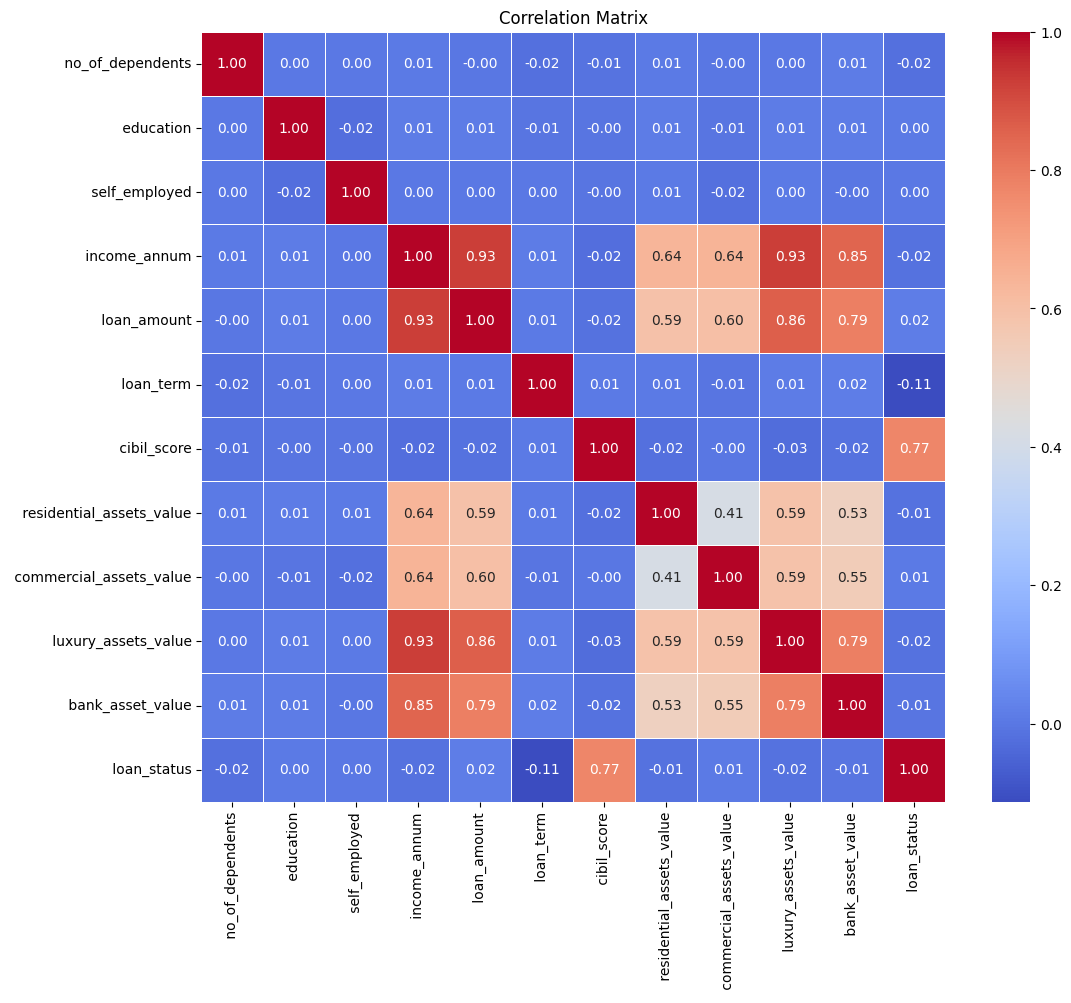

Selected Relevant Features:
[' cibil_score', ' loan_term']
Covariance Matrix:
                            no_of_dependents   education   self_employed  \
 no_of_dependents                   1.000000    0.002697        0.000765   
 education                          0.002697    1.000000       -0.023224   
 self_employed                      0.000765   -0.023224        1.000000   
 income_annum                       0.007266    0.011625        0.002368   
 loan_amount                       -0.003366    0.010631        0.001450   
 loan_term                         -0.020111   -0.008417        0.004107   
 cibil_score                       -0.009998   -0.004649       -0.004866   
 residential_assets_value           0.007376    0.010930        0.006144   
 commercial_assets_value           -0.001531   -0.006763       -0.017998   
 luxury_assets_value                0.002817    0.012471        0.004413   
 bank_asset_value                   0.011163    0.009424       -0.000215   
 loan_stat

In [8]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
correlations = corr_matrix[' loan_status'].sort_values(ascending=False)
relevant_features = correlations[abs(correlations) > 0.1].index.tolist()
relevant_features.remove(' loan_status')
print("Selected Relevant Features:")
print(relevant_features)
print("Covariance Matrix:")
print(corr_matrix)

In [9]:
print(df)

       no_of_dependents   education   self_employed   income_annum  \
0                     2           1               0        9600000   
1                     0           0               1        4100000   
2                     3           1               0        9100000   
3                     3           1               0        8200000   
4                     5           0               1        9800000   
...                 ...         ...             ...            ...   
4264                  5           1               1        1000000   
4265                  0           0               1        3300000   
4266                  2           0               0        6500000   
4267                  1           0               0        4100000   
4268                  1           1               0        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1        

Feature Selection using **SelectKBest**

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Assuming df is your DataFrame containing the data
k = 11
X = df.iloc[:, 0:11]
y = df.iloc[:, 11]
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector to the data
selector.fit(X, y)

# Get the scores/ranking of the features
feature_scores = selector.scores_

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_names = X.columns[selected_features_indices]

# Sort the selected features and their scores in descending order
sorted_indices = feature_scores.argsort()[::-1]
sorted_selected_features = selected_features_names[sorted_indices]
sorted_scores = feature_scores[sorted_indices]

# Print the selected features along with their scores in descending order
for feature_name, score in zip(sorted_selected_features, sorted_scores):
    print(f"Feature '{feature_name}': Score = {score}")


Feature ' cibil_score': Score = 6235.054590534256
Feature ' loan_term': Score = 55.22545796738981
Feature ' no_of_dependents': Score = 1.4006001729702904
Feature ' loan_amount': Score = 1.1131763752970667
Feature ' luxury_assets_value': Score = 1.020728281020977
Feature ' income_annum': Score = 0.9846688347948409
Feature ' residential_assets_value': Score = 0.8808766992878724
Feature ' commercial_assets_value': Score = 0.29015159308571714
Feature ' bank_asset_value': Score = 0.19606590791214007
Feature ' education': Score = 0.10320162169880803
Feature ' self_employed': Score = 0.0005064308399286643


In [11]:
feature_names = df.columns.values
print(feature_names)

[' no_of_dependents' ' education' ' self_employed' ' income_annum'
 ' loan_amount' ' loan_term' ' cibil_score' ' residential_assets_value'
 ' commercial_assets_value' ' luxury_assets_value' ' bank_asset_value'
 ' loan_status']


Feature Seelction using **Random Forest Regressor**

In [12]:
from sklearn.ensemble import RandomForestRegressor
# Train a Random Forest regressor
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X, y)

# Calculate feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature '%s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. Feature ' cibil_score' (0.827584)
2. Feature ' loan_term' (0.079397)
3. Feature ' loan_amount' (0.036811)
4. Feature ' income_annum' (0.025183)
5. Feature ' luxury_assets_value' (0.009550)
6. Feature ' commercial_assets_value' (0.006032)
7. Feature ' residential_assets_value' (0.005677)
8. Feature ' bank_asset_value' (0.004724)
9. Feature ' no_of_dependents' (0.003600)
10. Feature ' self_employed' (0.001001)
11. Feature ' education' (0.000439)


In [13]:
df = df.drop(columns=[' commercial_assets_value', ' residential_assets_value', ' luxury_assets_value', ' bank_asset_value', ' no_of_dependents', ' self_employed',  ' education'])

Final Output CSV

In [14]:
df.head()

,income_annum,loan_amount,loan_term,cibil_score,loan_status
0,9600000,29900000,12,778,1
1,4100000,12200000,8,417,0
2,9100000,29700000,20,506,0
3,8200000,30700000,8,467,0
4,9800000,24200000,20,382,0


**GRAPHS**

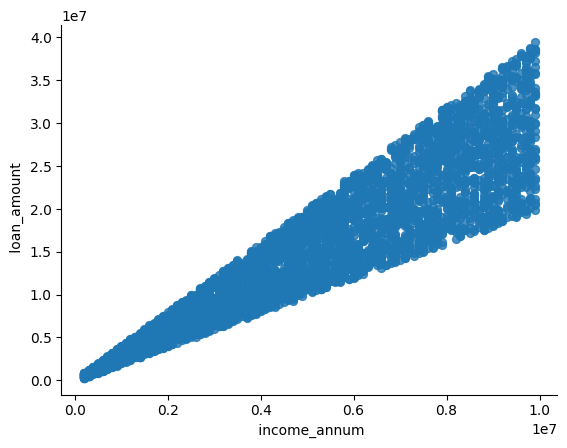

In [15]:
# @title  income_annum vs  loan_amount

from matplotlib import pyplot as plt
df.plot(kind='scatter', x=' income_annum', y=' loan_amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
gp = pd.DataFrame(df)

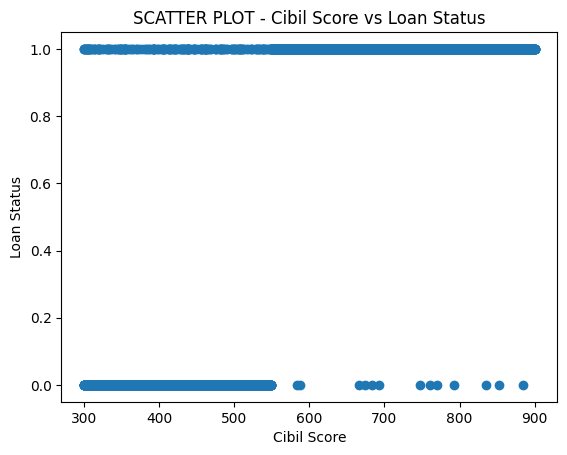

In [17]:
plt.scatter(gp[' cibil_score'],gp[' loan_status'])
plt.title("SCATTER PLOT - Cibil Score vs Loan Status")
plt.xlabel('Cibil Score')
plt.ylabel('Loan Status')
plt.show()

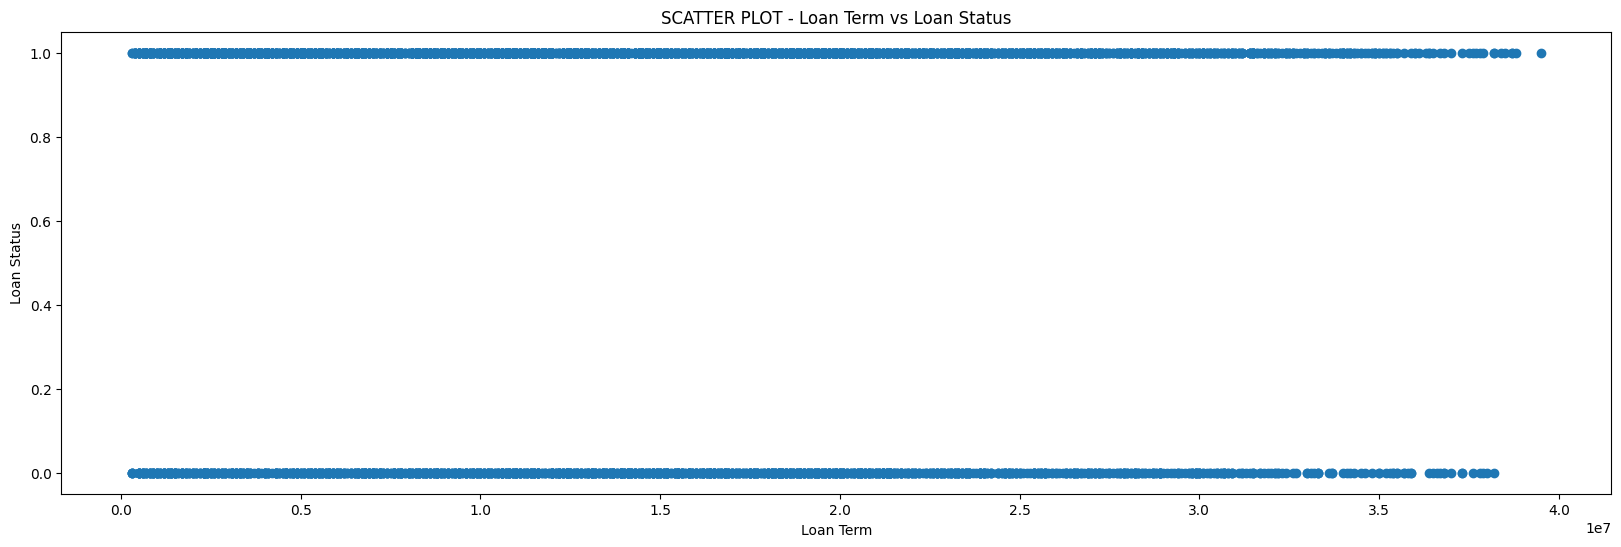

In [18]:
plt.figure(figsize=(20, 6))  # Adjust the width (12) and height (6) as needed
plt.scatter(gp[' loan_amount'], gp[' loan_status'])
plt.title("SCATTER PLOT - Loan Term vs Loan Status")
plt.xlabel('Loan Term')
plt.ylabel('Loan Status')
plt.show()


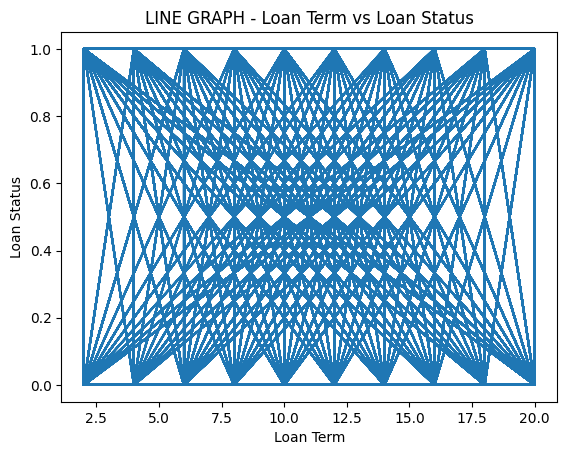

In [20]:
plt.plot(gp[' loan_term'],gp[' loan_status'])
plt.title("LINE GRAPH - Loan Term vs Loan Status")
plt.xlabel('Loan Term')
plt.ylabel('Loan Status')
plt.show()

In [21]:
sorted_df = df.sort_values(by=' loan_amount', ascending=True)

In [22]:
df.to_csv('outputfinal.csv', index=False)